<a href="https://colab.research.google.com/github/pavlovandrija99/face-detection-algorithms/blob/master/IT73_2018_Andrija_Pavlov_PPPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projekat iz predmeta Principi prezentacije i prepoznavanja oblika**

#**Tema: Detekcija lica**

#**Sadržaj:**

1. Uvod
2. Detekcija lica
3. Set podataka i korišćene biblioteke
4. **Viola-Jones** algoritam za detekciju lica
5. Detekcija lica pomoću **HOG (Histogram of Oriented Gradients) karakteristika**
6. Detekcija lica pomoću **MTCNN-a (Multi-Task Cascaded Convolutional Neural Network)**  
7. **FaceNet** algoritam za prepoznavanje lica
8. Zaključak
9. Literatura

#**1. Uvod**

Cilj predstavljenog projekta jeste istraživanje i primena algoritama/softverskih rešenja u oblasti mašinskog učenja, kao i dubokog učenja, sa ciljem rešavanja problema obrade fotografije, konkretno detekcije lica.

Detekcija objekata je jedna od tehnologija koja je povezana sa obradom slike i kompjuterskom vizijom i koja se bavi otkrivanjem instanci semantičkih objekata određene klase (na primer lice, automobil, saobraćajni znak) u digitalnim fotografijama i video zapisima.

Tokom poslednjih nekoliko godina prepoznavanje lica je veoma cenjeno i smatra se jednim od najperspektivnijih primena u oblasti analize fotografije.

Lice ima veoma veliki značaj u prenošenju identiteta i osećanja osobe. Iz ovog razloga automatski sistem za detekciju lica ima važnu ulogu u prepoznavanju lica, prepoznavanju izraza lica, interakciji između čoveka i računara, proceni položaja glave i drugim primenama.

U ovom radu je obrađena primena, analiza i poređenje različitih tehnika za detekciju lica.

#**2. Detekcija lica**

Detekcija lica je kompjuterska tehnologija zasnovana na veštačkoj inteligenciji koja se koristi za pronalaženje i identifikaciju ljudskih lica na digitalnim slikama. Tehnologija detekcije lica može se primeniti na različite oblasti, uključujući bezbednost, biometriju, sprovođenje zakona, zabavu i ličnu bezbednost, kako bi se obezbedio nadzor i praćenje ljudi u realnom vremenu.

Primarni cilj tehnologije detekcije lica je određivanje da li na fotografiji postoji lice ili ne, odnosno određivanje lokacije i veličine ljudskog lica na digitalnoj slici. Metod detekcije lica na fotografijama je komplikovan zbog prisutnih varijacija na licima ljudi kao što su poza, izraz, položaj i orijentacija, boja kože, naočare ili kosa na licu, razlike u kameri, osvetljenju i rezoluciji fotografije. Postoje metode koje računar može da koristi da bi to postigao, kompenzujući osvetljenje, orijentaciju ili udaljenost kamere. 

Postupak detekcije lica se sastoji od nekoliko koraka. Prvi korak je pretprocesiranje fotografija/seta podakta, učitavanje fotografije i transformisanje fotografije iz jednog modela boja u drugi, radi jednostavnije detekcije (Određeni algoritmi bolje funkcionišu kada se koristi odogvarajuću model boja). Nakon toga se po potrebi mogu izvršiti manipulacije poput promene veličine, sečenja, zamućivanja ili izoštravanja fotografije. Zatim se vrši segmentacija slike i primenjuje se odgovarajući algoritam detekcije lica. 
Na kraju iscrtava se na fotografiju pravougaonik u kojem se očekuje da se nalazi lice.


#**3. Set podataka i korišćene biblioteke**

**Set podataka** korišćen za izradu ovog projekta pod nazivom "cropped_images", sastoji se od ukupno 274 "isečenih" (cropped) fotografija poznatih svetskih glumaca: 



*   Robert Downey JR (51 slika)
*   Chris Ewans (50 slika)
*   Chris Hemsworth (53 slike)
*   Scarlet Johansson (54 slike)
*   Mark Ruffalo (66 slika)

Opisani set podataka se može pronaći na sledećem linku: https://drive.google.com/drive/folders/1o7OUqEDrXp2yWZC9b7t5xCa-tYyuBs6C
<br><br>

**Python biblioteke korišćene** za izradu projekta:



*   **OpenCV**
*   **NumPy**
*   **Matplotlib**
*   **Dlib**
*   **Tensorflow**
*   **MTCNN**
<br><br>

**OpenCV** je robusna *open-source* biblioteka koja se koristi u kompjuterskoj viziji, mašinskom učenju i procesiranju slika. OpenCV podržava širok spektar programskih jezika kao što su Python, C++, Java itd. Omogućava identifikovanje objekata, ljudskih lica, čak i ljudskog rukopisa na slikama i na video zapisima. Relativno lako se integriše sa drugim bibliotekama, na primer sa bibliotekom *NumPy*, tada je omogućeno da se svaka od operacija u *NumPy* biblioteci kombinuje sa operacijama unutar **OpenCV**-ja.
<br><br>

**NumPy** je fundamentalna biblioteka za sprovođenje različitih izračunavanja u *Python*-u. **NumPy** obezbeđuje rad sa multidimenzionim objektima nizova, različitih izvedenih objekata kao na primer matrice. Takođe provajduje širok asortiman operacija i rutina za brzu obradu nizova, uključujući matematičke, logičke, manipulacije oblicima, sortiranje, selekciju, osnovnu linearnu algebru i statističke operacije, random simulacije itd.
<br><br>

**Matplotlib** je robusna *Python* biblioteka, koja se koristi za kreiranje statičnih, animiranih i interaktivnih vizualizacija. **Matplotlib** se može primeniti unutar *Python* skripti +, *Python/IPython shells*, servera veb aplikacija i drugim različitim grafičkim korisničkim interfejsima.
<br><br>

**Dlib** je biblioteka za pravljenje aplikacija za mašinsko učenje i analizu podataka u C++. Iako je biblioteka prvobitno napisana u C++, može da se koristi i prilikom razvoja Python aplikacija. Sadrži veliki broj algoritama mašinskog učenja, numeričkih algoritama i api za obradu fotografija.
<br><br>

**Tensorflow** je *open-source* biblioteka koja se koristi za visoko performantna numerička izračunavanja. Zbog svoje fleksibilne arhitekture, omogućava laku integraciju sa različitim platformama/komponentama (CPUs, GPUs, TPUs), takođe i sa Desktop-om i serverima na mobilnim uređajima.
<br><br>

**MTCNN** je Python biblioteka koju je napisao Github korisnik ipacz. Ova biblioteka implementira naučni rad Zhang, Kaipeng et al. “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”

U ovom radu se koristi MTCNN detektor biblioteke i metoda detect_faces().
<br><br>


In [ ]:
# Vrši se povezivanje Google Colab-a sa Google Drive-om, gde se nalazi prethodno pomenuti set podataka.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pregled učitanog seta podataka (cropped_images) nakon mount-ovanja google drive-a na putanji "/content/drive"
!ls "/content/drive/My Drive/cropped_images"

chris_evans	 mark_ruffalo	   scarlett_johansson
chris_hemsworth  robert_downey_jr


In [ ]:
# Import potrebnih biblioteka za rad na projektu

import numpy as np
import cv2
import dlib
import os
from matplotlib import pyplot as plt
from PIL import Image

Image Dimension :  (744, 744, 3)


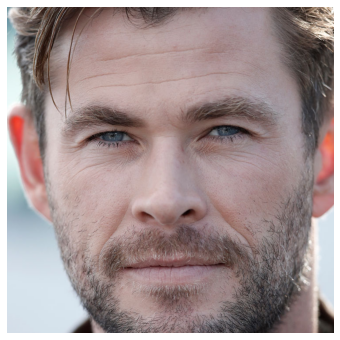

In [ ]:
# Učitavanje i prikazivanje slike u RGB modelu boja 
image = cv2.cvtColor(cv2.imread("/content/drive/My Drive/cropped_images/chris_hemsworth/chris_hemsworth15.png"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(image), plt.axis('off')

dimensions = image.shape
print('Image Dimension : ',dimensions)

# **4. Viola-Jones algoritam za detekciju lica**

**Viola-Jones algoritam** je dobio naziv po dvojici stručnjaka iz oblasti kompjuterske vizije (Paul Viola i Michael Jones). Bez obzira što je algoritam predstavljen još sad već davne 2001. godine, njegovom pojavom je došlo do velikog pomaka u oblasti digitalne detekcije objekata.

**Viola-Jones** je moćan algoritam i ozbiljno se pokazao u oblasti prepoznavanja lica u realnom vremenu. S druge strane, pomenuti algoritam je poprilično spor kada je reč o vremenu potrebnom da se istrenira u svrhu detektovanja lica, ali vrši detekciju lica u realnom vremenu sa impresivnom brzinom. 

Pomenuti algoritam radi sa slikama koje su konvertovane u *Grayscale* model boja. Funkcioniše tako što pretražuje manje delove (regije) slika i pokušava da pronađe lice u toj regiji, tako što traži poklapanje sa speicifičnim karakteristikama u tim regijama. Algoritam mora da proveri mnogo različitih pozicija, iz razloga što slike mogu da sadrže više lica na njima. **Viola-Jones** koristi Haar-like karakteristike u okviru algoritma za detektovanje lica.

**Algoritam se sastoji iz 4 glavna koraka**:


1.   Odabir Haar-like karakteristika
2.   Kreiranje integralne slike
3.   Pokretanje AdaBoost treniranja
4.   Kreiranje kaskadnog klasifikatora
<br><br>

###**Haar-like karakteristike**

Haar-like karakteristike su karakteristike digitalne slike, koje se koriste pri detekciji objekata. Za sva ljudska lica se može reći da dele određena zajednička svojstva, kao na primer da je regija lice gde se nalaze oči tamnija, od regije piksela okolo očiju, kao i da je regija gde se nalazi nos svetlija, od regije gde se nalaze oči.

Jedan prost način da se pokaže koji region je svetliji ili tamniji je da se sumira vrednost piksela ta 2 regiona i da se vrednosti uporede. Suma vrednosti piksela u tamnijem regionu će biti manja od sume vrednosti piksela u svetlijem regionu. Ponekad srednji deo regije će biti svetliji od regija koje ga okružuju, što se može interpretirate kao nos. Pomenuto se može postići uz pomoć Haar-like karakteristika, koja pomažu u interpretiranju različitih delova lica.

Postoje 3 tipa Haar-like karakteristika koje su Viola i Jones identifikovali tokom svog istraživanja:



1.   Edge karakteristike
2.   Line karakteristike
3.   Four-sided (rectangle) karakteristike

![](https://drive.google.com/uc?export=view&id=1pqO5OPAOKxu6dgOIjrN_9dLjmnaaUvBg)


1.   Edge karakteristike: Primer bi bio posmatranje ljudskog čela i očiju/obrva. Čelo je izložena, ravna površina na licu. Iz tog razloga reflektuje više svetlosti, pa se može okarakterisati kao svetla površina. Dok sa druge strane, obrve su generalno tamne površine. Tako da algoritam će posmatrati ovu tranziciju sa čela kao svetlije površine na obrve kao tamniju površinu, kao Edge karakteristiku ((a) Edge features).

2.   Line karakteristike: Šablon ove karakteristike može da bude belo-crno-belo, ili crno-belo-crno (kao Oreo). Za primer možemo da uzmemo nos na ljudskom licu. Vrh nosa, kao i njegov početak (most), sve do vrha nosa je deo ljudskog lica koji je relativno ravna površina, ali je zato ispupčena/iražena površina, na koju se reflektuje veća količina svetlosti, s time u vezi nos možemo okarakterisati kao svetlu površinu. Sa druge strane, nozdrve ljudskog nosa s obzirom da se nalaze sa donje strane nosa, prirodno upijaju manje sunčeve svetlosti i reprezentuju tamnije regije ljudskog lica. Može se zaključiti da nozdrve i nos odgovaraju Line karakteristici sa šablonom crno-belo-crno, što će slikovito biti prikazano na narednoj slici.

3.  Four-sided (rectangle) karateristike: Karakteristike ovog tipa su pogodne za pronalaženje dijagonalnih linija i delova slike koji su osvetljenji. Zavisno od osvetljenja, može da vrši selekciju vilice, brade ili bora...
Pomenute karateristike (vilica, brada, bore) su karakteristike koje nisu toliko značajne kada govorimo o detekciji lica. Drugim rečima, ove karakteristike se koriste za neke specijalizovanije svrhe.

Na narednoj slici će biti prikazan primer prethodno pomenutih karakteristika i njihove primene na ljudskom licu:
<br><br>

![](https://drive.google.com/uc?export=view&id=1eGnmLlZmhRNgKnE7onyNG5nMXpoPBC-f)
<br><br>

##**Integralna slika:** 
Kalkulacija svake od karakteristika zahteva izračunavanje vrednosti za sve piksele u okviru te određene karakteristike. Na nekom realnom primeru, ta izračunavanja mogu postati intenzivna i zahtevna, s obzirom da karakteristika mogu biti većeg obima (kvalitetnije i veće slike u smislu dimenzija slike). **Integralne slike** omogućavaju izračunavanje pomenutih kalkulacija vrednosti piksela za karakteristike na mnogo brži, efikasniji način.

Na slici će biti prikazana reprezentacija slike veličine 10x8 piksela, sa vrednostima piskela kao primer.
<br><br>
![](https://drive.google.com/uc?export=view&id=1C0s9biy5jUH3VAQQJZY0zOmz9yQ8BTG_)
<br><br>
Na narednoj slici će biti prikazan način na koji izračunavamo vrednosti za svaki piksel prilikom kreiranja integralne slike na osnovu vrednosti piksela polazne slike.
<br><br>
![](https://drive.google.com/uc?export=view&id=1qA32RthzKoKHOislw7agH2WE6M0TH5qS)
<br><br>
Sledeća prikazana slika prikazuje integralnu sliku sa izračunatom vrednošću piskela za 4. red i 3. kolonu originalne slike.
<br><br>
![](https://drive.google.com/uc?export=view&id=1thRjCGZg0sRpk7OqPNwpxlN-t8tI3fQD)
<br><br>
Na sledećoj slici biće prikazana kompletno izračunata integralna slika na osnovu prethodno prikazane originalne slike.
<br><br>
![](https://drive.google.com/uc?export=view&id=1XYhBMSYUjnCQVHOas7CYOjgoBb38rDZi)

U nastavku, na slikama će biti prikazana upotreba integralne slike.

![](https://drive.google.com/uc?export=view&id=1-K3y4xDgR95C8AH0AM8BkbJMYYK4dBBX)

![](https://drive.google.com/uc?export=view&id=1wEmZwtYLgE5eoEJSFMrF8c-onIJh4NCZ)

![](https://drive.google.com/uc?export=view&id=1TBv3MVD0be25XYpETQTThXlbrcSWvMm_)
<br><br>
Kalkulacija sume vrednosti svetlijih piksela: 255 - 215 + 46 - 55 = 31
Zatim algoritam izračunava srednju vrednost deleći dobijeni broj sa brojem kolona u frejmu (okviru, karakteristici, u ovom slučaju Edge karakteristici):
31 / 6 = 5.176

Zatim se ista procedura obavlja za izračunavanje sume vrednosti tamnih piksela:
<br><br>
![](https://drive.google.com/uc?export=view&id=1wUReaqwB7yguWj0fuzy7NGbctKOy-EuA)
<br><br>
Kalkulacija sume vrednosti tamnih piksela: 302 - 255 + 55 - 69 = 33
33 / 6 = 5.5

Na samom kraju, algoritam vrši oduzimanje dobijenih srednjih vrednosti i na osnovu postavljenog treshold-a, zaključuje da li postoji Edge karkteristika u tom delu slike.

5.5 - 5.176 = 0.333

<br><br>

###**AdaBoost algoritam:** 
Algoritam mašinskog učenja koji se koristi u okviru Viola-Jones algoritma. Koristi se za poboljšanje performansi algoritma za detekciju lica. U nastavku će biti objašnjeno za šta se koristi i na koji način **AdaBoost algoritam** poboljšava performanse algoritma za detekciju lica.

U okviru "prozora" za detekciju, veličine 24x24 piksela, postoji skoro 160,000 mogućih karakteristika, ali samo nekolicina iz tog skupa karakteristika je važna za identifikaciju lica na slikama. **AdaBoost algoritam** se koristi u svrhu identifikacije/odabira najboljih karakteristika unutar tih 160,000 karakteristika.

U okviru Viola-Jones algoritma, svaka od karakteristika predstavlja slabu jedinicu učenja za algoritam. S timm u vezi, kako bi se odredio tip i veličina karakteristike (Haar-like karakteristike) koje će se naći u finalnom klasifikatoru, **AdaBoost algoritam** vrši proveru performansi klasifikatora.

Kako bi se izračunala performansa klasifikatora, vrši se evaluacija rezultata treniranja algoritma nad podregijama na određenoj slici. Neki podregioni će postići bolji rezultat i pokazati se kao jak klasifikator. Takvi delovi će biti identifikovani kao pozitivni, što će značiti da je klasifikator klasifikovao da tu postoji ljudsko lice na slici. A klasifikatori koji ne daju dobar rezultat, će biti klasifikovani kao negativni.

Klasifikatori koji su se pokazali dobro, dodeljena im je veća "težina" ili važnost. Finalni rezultat je jak klasifikator, boost-ovani klasifikator, koji sadrži, slabe klasifikatore sa najboljim performansama.

Zaključak, kada treniramo **AdaBoost algoritam** kako bi identifikovali korisne/značajne Haar-like karakteristike, algoritmu kao ulaz dajemo informacije u vidu setova podataka za trening i kroz iteracije se algoritam trenira, kako bi na osnovu datih ulaznih informacija, vršio predikciju izlaznih vrednosti. Kao finalni rezultat, algoritam postavlja minimalni treshold, i na osnovu njega odlučuje da li neka od karakteristka može da se okarakteriše kao bitna i značajna ili ne.

<br><br>

###**Kaskadni klasifikator:**

AdaBoost algoritam će izvršiti selekciju najbolje performantnih Haar-like karakteristika, ali idalje je vremenski zahtevan proces izračunati vrednosti u okviru ovih karakteristika za svaki region slike koji se obrađuje. Zadatak **kaskadnog klasifikatora** je da na brz način odbaci slike koje ne sadrže lica i na taj način da se redukuje na vreme nepotrebno izračunavanje karakteristika.
Takođe ovakav pristup omogućava brzinu algoritma u svrhu identifikacije lica u realnom vremenu.

Postavljanjem sistema kaskadnog klasifikatora, proces indentifikacije se deli u nekoliko koraka. U prvom koraku postavljen je klasifikator koji se sastoji od karakteristika najboljih performansi, to su najčešće karakteristike koje identifikuju nos ili oči. Ukoliko je podregion slike koji se evaluira označen kao pozitivan, dobija etiketu "možda" i kao takav ulazi u sledeći klasifikator.
Iterativno se proces ponavlja i ako podregion bude etiketiran kao pozitivan od strane svih klasifikatoru u sistemu **kaskadnog klasifikatora**, tada je ta slika identifikovana kao slika koja sadrži lice. 

U nastavku će biti prikazana implementacija Viola-Jones algoritma.






##**Implementacija Viola-Jones algoritma**

(<matplotlib.image.AxesImage at 0x7f39fc1a3610>, (-0.5, 743.5, 743.5, -0.5))

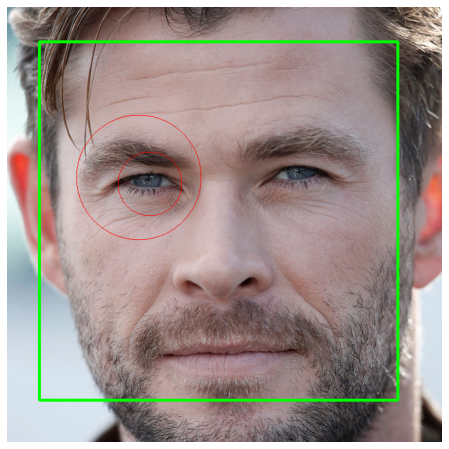

In [ ]:
# Implementacija Viola-Jones algoritma

# Putanja do istreniranih Haar Cascade modela, sačuvanih kao XML fajlovi. Nalaze se u okviru OpenCV-ja.
cascPathface = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
cascPatheyes = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_eye_tree_eyeglasses.xml"

# Učitavanje klasifikatora za detekciju lica i očiju, respektivno.
faceCascade = cv2.CascadeClassifier(cascPathface)
eyeCascade = cv2.CascadeClassifier(cascPatheyes)

# S obzirom na prirodu algoritma i da on funkcioniše sa slikama u Grayscale modelu boja, konvertujemo sliku u Grayscale model boja.
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Instanca kaskadnog klasifikatora sadrži metodu detectMultiScale(), koja prima slika kao argument i pokreće kaskadni klasifikator koji obrađuje sliku.
# Nakon izvršenja kaskadnog klasifikatora, faces objekat sadrži koordinate koje odgovaraju detekcijama lice pronađenim na slici.
# Svaka detekcija je određena koordinatom gore-levo ugla kvadrata kao i dužinom i širinom kvadrata u kom se nalazi detektovano lice.
faces = faceCascade.detectMultiScale(grayscale_image, scaleFactor=1.1, minNeighbors=5, minSize=(60, 60), flags=cv2.CASCADE_SCALE_IMAGE)

# faceROI objekat će sadržati koordinate lica/lice
# eyes objekat će sadržati koordinate očiju lica, i biće izvršena markiranje očiju krugovima.
for (x,y,w,h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h),(0,255,0), 4)
        faceROI = image[y:y+h,x:x+w]
        eyes = eyeCascade.detectMultiScale(faceROI)
        for (x2, y2, w2, h2) in eyes:
            eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            radius = int(round((w2 + h2) * 0.25))
            image = cv2.circle(image, eye_center, radius, (255, 0, 0))

# # Prikaz fotografije na kojoj je detektovano lice.
plt.figure(figsize=(8,8))
plt.imshow(image), plt.axis('off')

# **5. Detekcija lica pomoću HOG (Histogram of Oriented Gradients) karakteristika**

**HOG** je jednostavan i moćan deskriptor karakteristika. Korsiti se ne samo za detekciju lica, već se i naširoko primenuje u oblasti detekcije objekata, kao što su automobili, životinje, voće itd. **HOG** je robustan kada je reč o detekciji objekata, s obzirom da oblik bilo kog objekta karakteriše intenzitet lokalnog gradijenta distribucije i pravac ivica na objektima, to su stvari koje **HOG** koristi u okviru svog algoritma.
<br><br>

Osnovna ideja **HOG-a**, ujedno i prvi korak je podela slike u male ćelije (takozvani *grid*).
<br><br>
![](https://drive.google.com/uc?export=view&id=12IfD9-3GIrV_qG2RMCGr4tumId00K6Fx)
<br><br>
Drugi korak je kalkulacija gradijenta magnitude i pravca za svaki piksel u okviru ćelije na podeljenoj slici (za svaku ćeliju u okviru *grid*-a). Za svaku ćeliju u *grid*-u, se izračunavaju vektori karakteristika (*feature vectors*), na osnovu izračunatih gradijenata magnitude i pravaca svakog piksela. I na samom kraju uz pomoć vektora karakteristika se kreiraju histogrami za svaku od ćelija u okviru *grid*-a.
<br><br>

![](https://drive.google.com/uc?export=view&id=1nyYGvVfjDu4e_rEhjK7UznoqYnCUf_MN)

<br><br>
Treći korak je kreiranje jednog finalnog vektora karakteristika, koji će obuhvatati sve prethodno kreiranje vektore karakteristika za svaku od ćelija u okviru grid-a. Svaki od kreiranih finalnih histograma je jednistven, unikatan za svako lice, s obzirom da ne postoje 2 potpuno identične osobe na planeti zemlji.
<br><br>
![](https://drive.google.com/uc?export=view&id=1Q6Sq-0BmsPqvJ2IwzfcKOUhlxVh_KzT_)

<br><br>
Glavni nedostatak detekcije lica na osnovu **HOG**-a je taj da ovaj način detekcije lica nije efikasan u detekciji lica koje su pod čudnim uglom. Najbolje performanse ovaj algoritam daje kada su lica u frontalnoj poziciji u odnosu na kameru. **HOG** je koristan za upotrebu kada se radi o detekciji i skeniranju dokumenata kao na primer vozačkih dozvola, pasoša... 
S druge strane, nije pogodan za detekciju lica na videima u realnom vremenu.
<br><br>
<br><br>

![](https://drive.google.com/uc?export=view&id=1ZtpgWpTHhUiE1AbKy41Q1haqAs3y9WRG)

U nastavku će biti prikazana implementacija **HOG**-a.

##**Implementacija HOG**-a

(<matplotlib.image.AxesImage at 0x7f39fc184590>, (-0.5, 979.5, 979.5, -0.5))

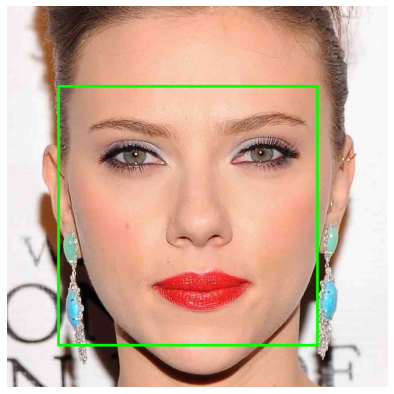

In [ ]:
# Biće korišćena dlib python biblioteka, koja sadrži metodu get_frontal_face_detector(), koja vraća HOG detektor lica.

# Učitavanje slike iz seta podataka i konvertovanje iste u Grayscale model boja.
scarlett_johansson_image = cv2.cvtColor(cv2.imread("/content/drive/My Drive/cropped_images/scarlett_johansson/scarlett_johansson2.png"), cv2.COLOR_BGR2RGB)

grayscale_scarlett_johansson_image = cv2.cvtColor(scarlett_johansson_image, cv2.COLOR_BGR2GRAY)

# Instanciranje HOG detektora lica iz dlib biblioteke
hogFaceDetector = dlib.get_frontal_face_detector()

# Detektovanje lica na slici putem HOG face detektora
faces = hogFaceDetector(grayscale_scarlett_johansson_image, 1)

# Iteriranje kroz pronađena lica na slici i iscrtavanje kvadrata koji obuhvataju detektovano lice/a.
for (i, rect) in enumerate(faces):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    #Iscrtavanje kvadrata
    cv2.rectangle(scarlett_johansson_image, (x, y), (x + w, y + h), (0, 255, 0), 5)

# Prikaz rezultata
plt.figure(figsize=(7,7))
plt.imshow(scarlett_johansson_image), plt.axis('off')

# **6. Detekcija lica pomoću MTCNN-a (Multi-Task Cascaded Convolutional Neural Networks)**

*Multi-task Cascaded Convulutional Networks* (**MTCNN**) je razvijen kao rešenje za detekciju lica, ujedno i za proces poravnanja lica (*face aligment*). Konvoluciona neurosnka mreža, kakva je **MTCNN**, koristi se uz algoritme dubokog mašinskog učenja i specifično se koristi za detektovanje/prepoznavanje lica i procesiranje piksela.

**MTCNN** proces detekovanja lica se sastoji iz 3 faze, nakon čega je konvoluciona neuronska mreža detektovala lice i uspela pronaći oči, nos, usta na slici.

###**3 faze MTCNN-a:**


1.  U prvoj fazi, prvi korak je uzeti sliku i promeniti joj veličinu nekoliko puta (*resize*), sa ciljem da se dobije piramida od slika, koja će biti prikazana na narednoj slici. Tako dobijena piramida od slika (slike različitih dimenzija), je ulaz u algoritam.
U prvoj fazi se koristi takozvana P-net (*Prosposal Network*) neuronska mreža. P-net mreža ima zadatak da predloži regione lica kandidata na slici i *bounding box*-ove u okivru kojih bi se nalazilo lice.
<br><br>

![](https://drive.google.com/uc?export=view&id=1U-Zsw9OwFZHmZQAx6kdWfVyj4dEfeunN)

<br><br>

2. U drugoj fazi svi kandidati iz P-net mreže su ulaz R-net mrežu (*Refine Network*). R-net mreža vrši dalje redukovanje kandidata tako što vrši kalibraciju *bounding box*-ova i vrši spajanje onih *box*-ova koji se preklapaju. Izlaz iz R-net mreže je odgovor da li je dati ulaz lice ili ne, odnosno vektor koji sadrži 4 elementa, i koji se interpretira kao *box* u okviru kojeg se nalazi lice. Takođe izlaz R-net mreže je i vektor sa 10 elemenata, koji se interpretira kao karakteristika lice kao što su oči, nos, usta.
<br><br>

3. Treća faza, odnosno O-net (*Output Network*) je slična R-net neuronskoj mreži. Cilj O-net neuronske mreže je da izvrši još detaljniju obradu slike, i kao izlaz daje 5 karakterističnih pozicija na ljudskom licu, oči, nos, usta. Pomenutih 5 karakteristika će biti prikazano prilikom implementacije **MTCNN-a**.

U nastavku će biti prikazana implementacija **MTCNN-a**.



## **Implementacija MTCNN-a**

In [ ]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(<matplotlib.image.AxesImage at 0x7f3987efd250>, (-0.5, 338.5, 338.5, -0.5))

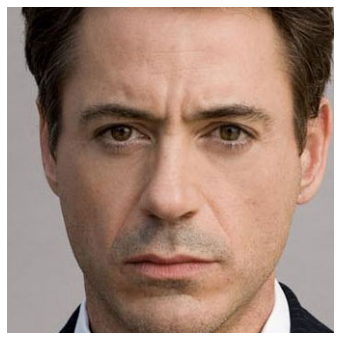

In [ ]:
# Učitavanje slike 
robert_downey_jr = cv2.cvtColor(cv2.imread("/content/drive/My Drive/cropped_images/robert_downey_jr/robert_downey_jr31.png"), cv2.COLOR_BGR2RGB)

# Prikaz učitane slike
plt.figure(figsize=(6,6))
plt.imshow(robert_downey_jr), plt.axis('off')


In [ ]:
from mtcnn import MTCNN

detector = MTCNN()
faces = detector.detect_faces(robert_downey_jr)

print("Faces: ", faces)

1/1 [==============================] - 0s 176ms/step
Faces:  [{'box': [42, 0, 256, 340], 'confidence': 0.999981164932251, 'keypoints': {'left_eye': (114, 131), 'right_eye': (230, 131), 'nose': (165, 204), 'mouth_left': (124, 265), 'mouth_right': (215, 265)}}]


(<matplotlib.image.AxesImage at 0x7f398724a490>, (-0.5, 338.5, 338.5, -0.5))

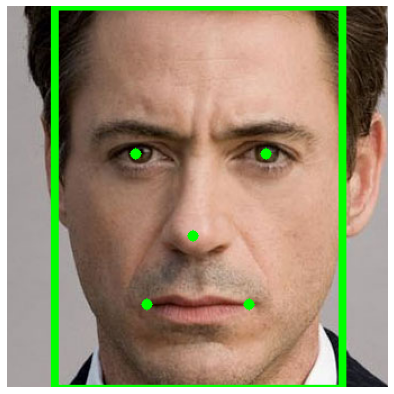

In [ ]:
for face in faces:
  x, y, w, h = face['box']
  mtcnn_img = cv2.rectangle(robert_downey_jr, (x, y), (x+w, y+h), (0, 255, 0), 5)
  for key, value in face['keypoints'].items():
    mtcnn_img = cv2.circle(mtcnn_img,value, 2, (0, 255, 0), 5)


plt.figure(figsize=(7,7))
plt.imshow(mtcnn_img), plt.axis('off')


# **7. FaceNet algoritam za prepoznavanje lica**

**FaceNet** je duboka neuronska mreža, koristi se za ekstrakciju karateristika iz slika na kojima se nalazi ljudsko lice. Ovaj algoritam je predstavljen 2015. godine, od strane istraživača iz Google-a.

U nastavku će biti objašnjen način na koji **FaceNet** algoritam funkcioniše.

<br><br>
![](https://drive.google.com/uc?export=view&id=1uMbZqW5UNG4dmpbLYzWdnRnpR4OmoRBr)
<br><br>
**FaceNet** uzima sliku lica kao ulaz, a kao izlaz daje vektor od 128 brojeva, koji reprezentuju najznačajnije karakteristike na licu. Dobijeni vektor se naziva ***embedding***, iz razloga što su sve najjznačajnije karakteristike *embedovane* u vektor od 128 brojeva. Dobijeni vektor sličnih lica je tako sličan po vrednostima.

*Embedding-s* su vektori koji mogu interpretirati kao tačke u okviru Dekartovog koordinatnog sistema. S time u vezi, možemo prikazati sliku lica u okviru koordinatnog sistema, gde će svaka slika imati svoju poziciju u pomnenutom koordinatnom sistemu, s obzitom da je svaka slika reprezentovana pomoću vektora.

<br><br>
![](https://drive.google.com/uc?export=view&id=1-0O9g3g2Eqa7Xllg2_gazDClhULQWrYG)
<br><br>

Jedan od mogućih načina primene algoritma za prepoznavanje osobe je izraunavanje vektora nove slike koja je predmet prepoznavanja, izračuna se distanca od postojećih poznatih ljudskih lica, i ako je vektor lica (*embedding*) najbliži vektoru lica osobe A, možemo reći da ulazna slika sadrži lice osobe A.
<br><br>








In [ ]:
pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 56.1 MB/s 


In [ ]:
# Import biblioteka korišćenih za učitavanje videa
import imageio
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

# Funkcija za prikazivanje videa
def display_video(video):
    fig = plt.figure(figsize=(10,10))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime


In [ ]:
# Učitvanje i prikazivanje videa
video = imageio.mimread('/content/drive/My Drive/classification.mp4', memtest=False)
HTML(display_video(video).to_html5_video())

<br><br>
Kako bi **FaceNet** funkcionisao i davao zadovoljavajuće performanse i kako bi se istrenirao algoritam, potrebno je mnogo slika ljudskog lica. 

Na samom početku treninga, **FaceNet** algoritam generiše nasumične vektore za svaku sliku, što za posledicu ima da su slike nasumično razbacane po koordinatnom sistemu, ako bi želeli da ih prikažemo.
<br><br>

![](https://drive.google.com/uc?export=view&id=1amQgqPIatoh9ACk3m7g-T0KQ_nnMI-qj)
<br><br>

**FaceNet** algoritam sadrži sledeći korake: 


1.   Nasumično selektuje polaznu (osnovnu) sliku.
2.   Nasumično selektuje sliku iste osobe iz skupa slika iste osobe. To predstavlja pozitivan slučaj (primer).

3.   Nasumično selektuje sliku neke druge osobe iz skupa slika druge osobe. Ovo predstavlja negativan primer.

4. Podešavaju se parametri algoritma sa ciljem da su pozitivni primeri bliži polaznoj slici, u odnosu na negativnu primere.

Ova četiri koraka algoritma se ponavljaju, sve dok se sve slike lica jedne osobe nalaze jedne pored drugih, slike lica druge osobe jedne pored drugih itd.

U nastavku će biti priložen video, na kojem se mogu videti koraci algoritma.

<br><br>




In [ ]:
video = imageio.mimread('/content/drive/My Drive/learning.mp4', memtest=False)
HTML(display_video(video).to_html5_video())

<br><br>

Jedno od pitanja koja se mogu postaviti kada se posmatra način na koji funkcioniše **FaceNet** algoritam, koja je semantika vrednosti/brojeva unutar generisanih vektora koji reprezentuju sliku. Da li te vrednosti predstavljaju veličinu očiju, distancu između nosa i očiju? Širinu usta?

Zapravo, činjenica je da semantika vrednosti pomenutih vektora nije poznata i veoma je teško interpretirati ih. Prilikom treninga **FaceNet** algoritma mi ne govorimo eksplicitno algoritmu značenje koje bit ti brojevi mogli da imaju, jedini zahtev naš je da vektori sličnih lica budu što približniji po vrednostima.

**FaceNet** ne tumači karakteristike lica na slici kao što mi to radimo, na primer razmak između očiju, dužina nosa itd. Nego algoritam probava različite kombinacije sličnij karakteristika, dok ne pronađe najbolju kombinaciju, onu koja daje najbolje rezultate za dati ulaz. Iz ovog razloga je teško interpretirati vrednosti ovih vektora.

<br><br>
![](https://drive.google.com/uc?export=view&id=1izzdxymzarUflOSOnqd1d1caZNEqrgsV)
<br><br>

Slika iznad reprezentuje šta je to **FaceNet** algoritam, na interesantan i koncizan način. **FaceNet** alogirtam možemo da tumačimo kao funkciju koja uzima sliku kao ulaz i kao izlaz daje vektor od 128 brojeva koji odgovara slici.
<br><br>



# **8. Zaključak**

U ovoj sekciji će biti opisane prednosti i mane algoritama za detekciju lica, koji su korišćeni prilikom izrade ovog projekta (***Viola-Jones***, ***HOG***, ***MTCNN*** i ***FaceNet***).

***Viola-Jones*** algoritam za detekciju lica procesira slike sa relativno visokom preciznošću detekcije. Algoirtam je efikasan pri detekciji lica u realnom vremenu. Jednostavan je za implementaciju. Veličina seta podataka za trening koji Viola-Jones algoritam zahteva je oko 20,000 primera, što je umnogome manja količina podataka za trening algoritma, nego što je to slučaj sa ostalim algoritmima baziranim na dubokom učenju. S druge strane preciznost algoritma opada kada je reč o detekcija lica starijih ljudi. Razlog za to može biti pojava bora na ljudskim licima, što je česta pojava, i to može uticati na ekstrakciju karakteristika sa lica. Algoritam je u nemogućnosti da detekuje lica na slikama, slikana iz profila. Vreme koje je potrebno za trening ovog algoritma je relativno dugačko, i do nekoliko nedelja.
<br><br>
***HOG*** - Glavni nedostatak detekcije lica na osnovu *HOG*-a je taj da ovaj način detekcije lica nije efikasan u detekciji lica koje su pod čudnim uglom. Najbolje performanse ovaj algoritam daje kada su lica u frontalnoj poziciji u odnosu na kameru. *HOG* je koristan za upotrebu kada se radi o detekciji i skeniranju dokumenata kao na primer vozačkih dozvola, pasoša... 
S druge strane, nije pogodan za detekciju lica na videima u realnom vremenu.
<br><br>

***MTCNN*** je veoma precizan i robustan algoritam kada je reć o detekciji ljudskog lica. Algoritam ispravno detektuje lica iako su ona različitih veličina, pod različitim intenzitetom osvetljenja ili ako se nalaze pod čudnijim uglovima na slikama. *MTCNN* je sporiji algoritam od Viola-Jones algoritma, ali uz korišćenje GPU-a, ta razlika se ne oseti.
<br><br>

***FaceNet*** je algoritam koji je sposoban da uspešno identifikuje slična lica, čak iako lica sadrže različite grimase i ako se nalaze pod različitim uglovima na slikama. Takođe prepoznaje lice i prilikom postojanja različitih transformacija osvetljenja. Još jedna od mogućnosti je da može da prepozna ista lica iako su lica markirana delom na slici, kao i da prepozna lice iako kao ulaz dobije sliku na kojoj se nalazi samo jedna polovina lica.

S druge strane nedostatak algoritma je što nije uspešan u prepoznavanju lica ukoliko se ispred lica na slici nalazi određeni tekst. Takođe ukoliko ljudi na slikama nose naočare, algoritam se fokusira na tip naočara više nego na ljudsko lice, što dovodi do ozbiljnog pada u performasni dobrih rezultata prepoznavanja.

# **9. Literatura**



* https://opencv.org/about/

* https://matplotlib.org/

* https://www.tensorflow.org/learn

* https://numpy.org/

*   https://levelup.gitconnected.com/haar-like-features-seeing-in-black-and-white-1a240caaf1e3

*   https://www.mygreatlearning.com/blog/viola-jones-algorithm/

*   https://levelup.gitconnected.com/the-integral-image-4df3df5dce35

*   https://www.eeweb.com/real-time-face-detection-and-recognition-with-svm-and-hog-features/

* https://medium.com/mlcrunch/face-detection-using-dlib-hog-198414837945

* https://towardsdatascience.com/face-detection-models-which-to-use-and-why-d263e82c302c

* https://towardsdatascience.com/how-does-a-face-detection-program-work-using-neural-networks-17896df8e6ff

* https://www.techtarget.com/searchenterpriseai/definition/convolutional-neural-network#:~:text=A%20CNN%20is%20a%20kind,the%20network%20architecture%20of%20choice.

* https://medium.com/@iselagradilla94/multi-task-cascaded-convolutional-networks-mtcnn-for-face-detection-and-facial-landmark-alignment-7c21e8007923


